In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import numpy as np
import scipy.stats

In [2]:
def democraticpvalue(signifs):
    a=np.prod(1.0 - scipy.stats.norm.sf(signifs), axis=-1)
    return 1.0-a*(1.0-np.log(a))

def democraticsignif(signifs):
    return scipy.stats.norm.isf(democraticpvalue(signifs))

def suminquad(signifs):
    return np.sqrt(np.sum(np.power(signifs, 2), axis=-1))

assert np.isclose(democraticsignif([5.0,0.5]), 1.61251448291)
assert np.isclose(suminquad([5.0, 0.5]), 5.02493781056)

In [3]:
bins=100
bmin=0.
bmax=5.

grid = np.mgrid[bmin:bmax:(bins+1)*1j, bmin:bmax:(bins+1)*1j]
signifs = grid.T
yy, xx = grid

dp0 = democraticsignif(signifs)
sqd = suminquad(signifs)

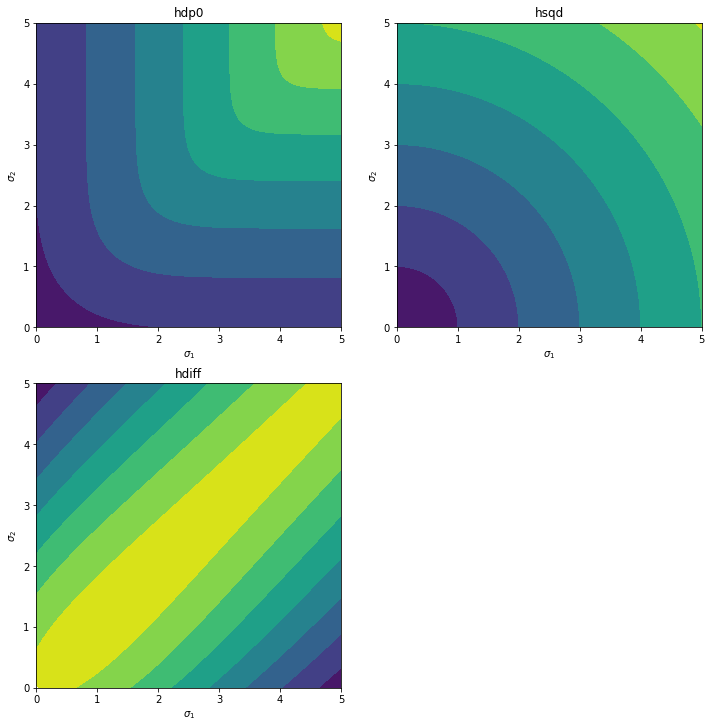

In [4]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))
axd = fig.subplot_mosaic([["cdp0", "csqd"], ["cdif", "."]]);

axd['cdp0'].sharex(axd['cdif'])
axd['cdp0'].sharey(axd['csqd'])

for ax in axd.values():
    ax.set_xlabel('$\sigma_1$')
    ax.set_ylabel('$\sigma_2$')
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
axd['cdp0'].set_title('hdp0')
axd['csqd'].set_title('hsqd')
axd['cdif'].set_title('hdiff')


axd['cdp0'].contourf(xx, yy, dp0);
axd['csqd'].contourf(xx, yy, sqd);
axd['cdif'].contourf(xx, yy, np.where(sqd > 0, (dp0-sqd), np.nan));